<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(8693, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

**Data Cleaning**

In [7]:
df = df.drop(['Cabin','Destination','Name','PassengerId'],axis=1)

In [8]:
# Replace missing values in 'Age' column with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)  

In [9]:
# Replace missing values in 'HomePlanet' column with 'Unknown'
df['HomePlanet'].fillna('Unknown', inplace=True)  

In [10]:
# Replace missing values in 'CryoSleep' column with 'Unknown'
df['CryoSleep'].fillna('Unknown', inplace=True)

In [11]:
# Replace missing values in 'VIP' column with 'Unknown'
df['VIP'].fillna('Unknown', inplace=True)

In [12]:
# Replace missing values in 'RoomService' column with mean
df['RoomService'].fillna(df['RoomService'].mean(), inplace=True)

In [13]:
# Replace missing values in 'FoodCourt' column with mean
df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)

In [14]:
# Replace missing values in 'ShoppingMall' column with mean
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)

In [15]:
# Replace missing values in 'Spa' column with mean
df['Spa'].fillna(df['Spa'].mean(), inplace=True)

In [16]:
# Replace missing values in 'VRDeck' column with mean
df['VRDeck'].fillna(df['VRDeck'].mean(), inplace=True)

In [17]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [18]:
df.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [19]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', 'Unknown'], dtype=object)

**Converting Categorical Variable Into Numeric Values**

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
LE = LabelEncoder()

In [22]:
df['HomePlanet'] = LE.fit_transform(df['HomePlanet'])

In [23]:
df['CryoSleep'] = df['CryoSleep'].astype('string')

In [24]:
df['CryoSleep'] = LE.fit_transform(df['CryoSleep'])

In [25]:
df['VIP'] = df['VIP'].astype('string')

In [26]:
df['VIP'] = LE.fit_transform(df['VIP'])

In [27]:
df['Transported'] = LE.fit_transform(df['Transported'])

In [28]:
df.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1


**Data Visualization**

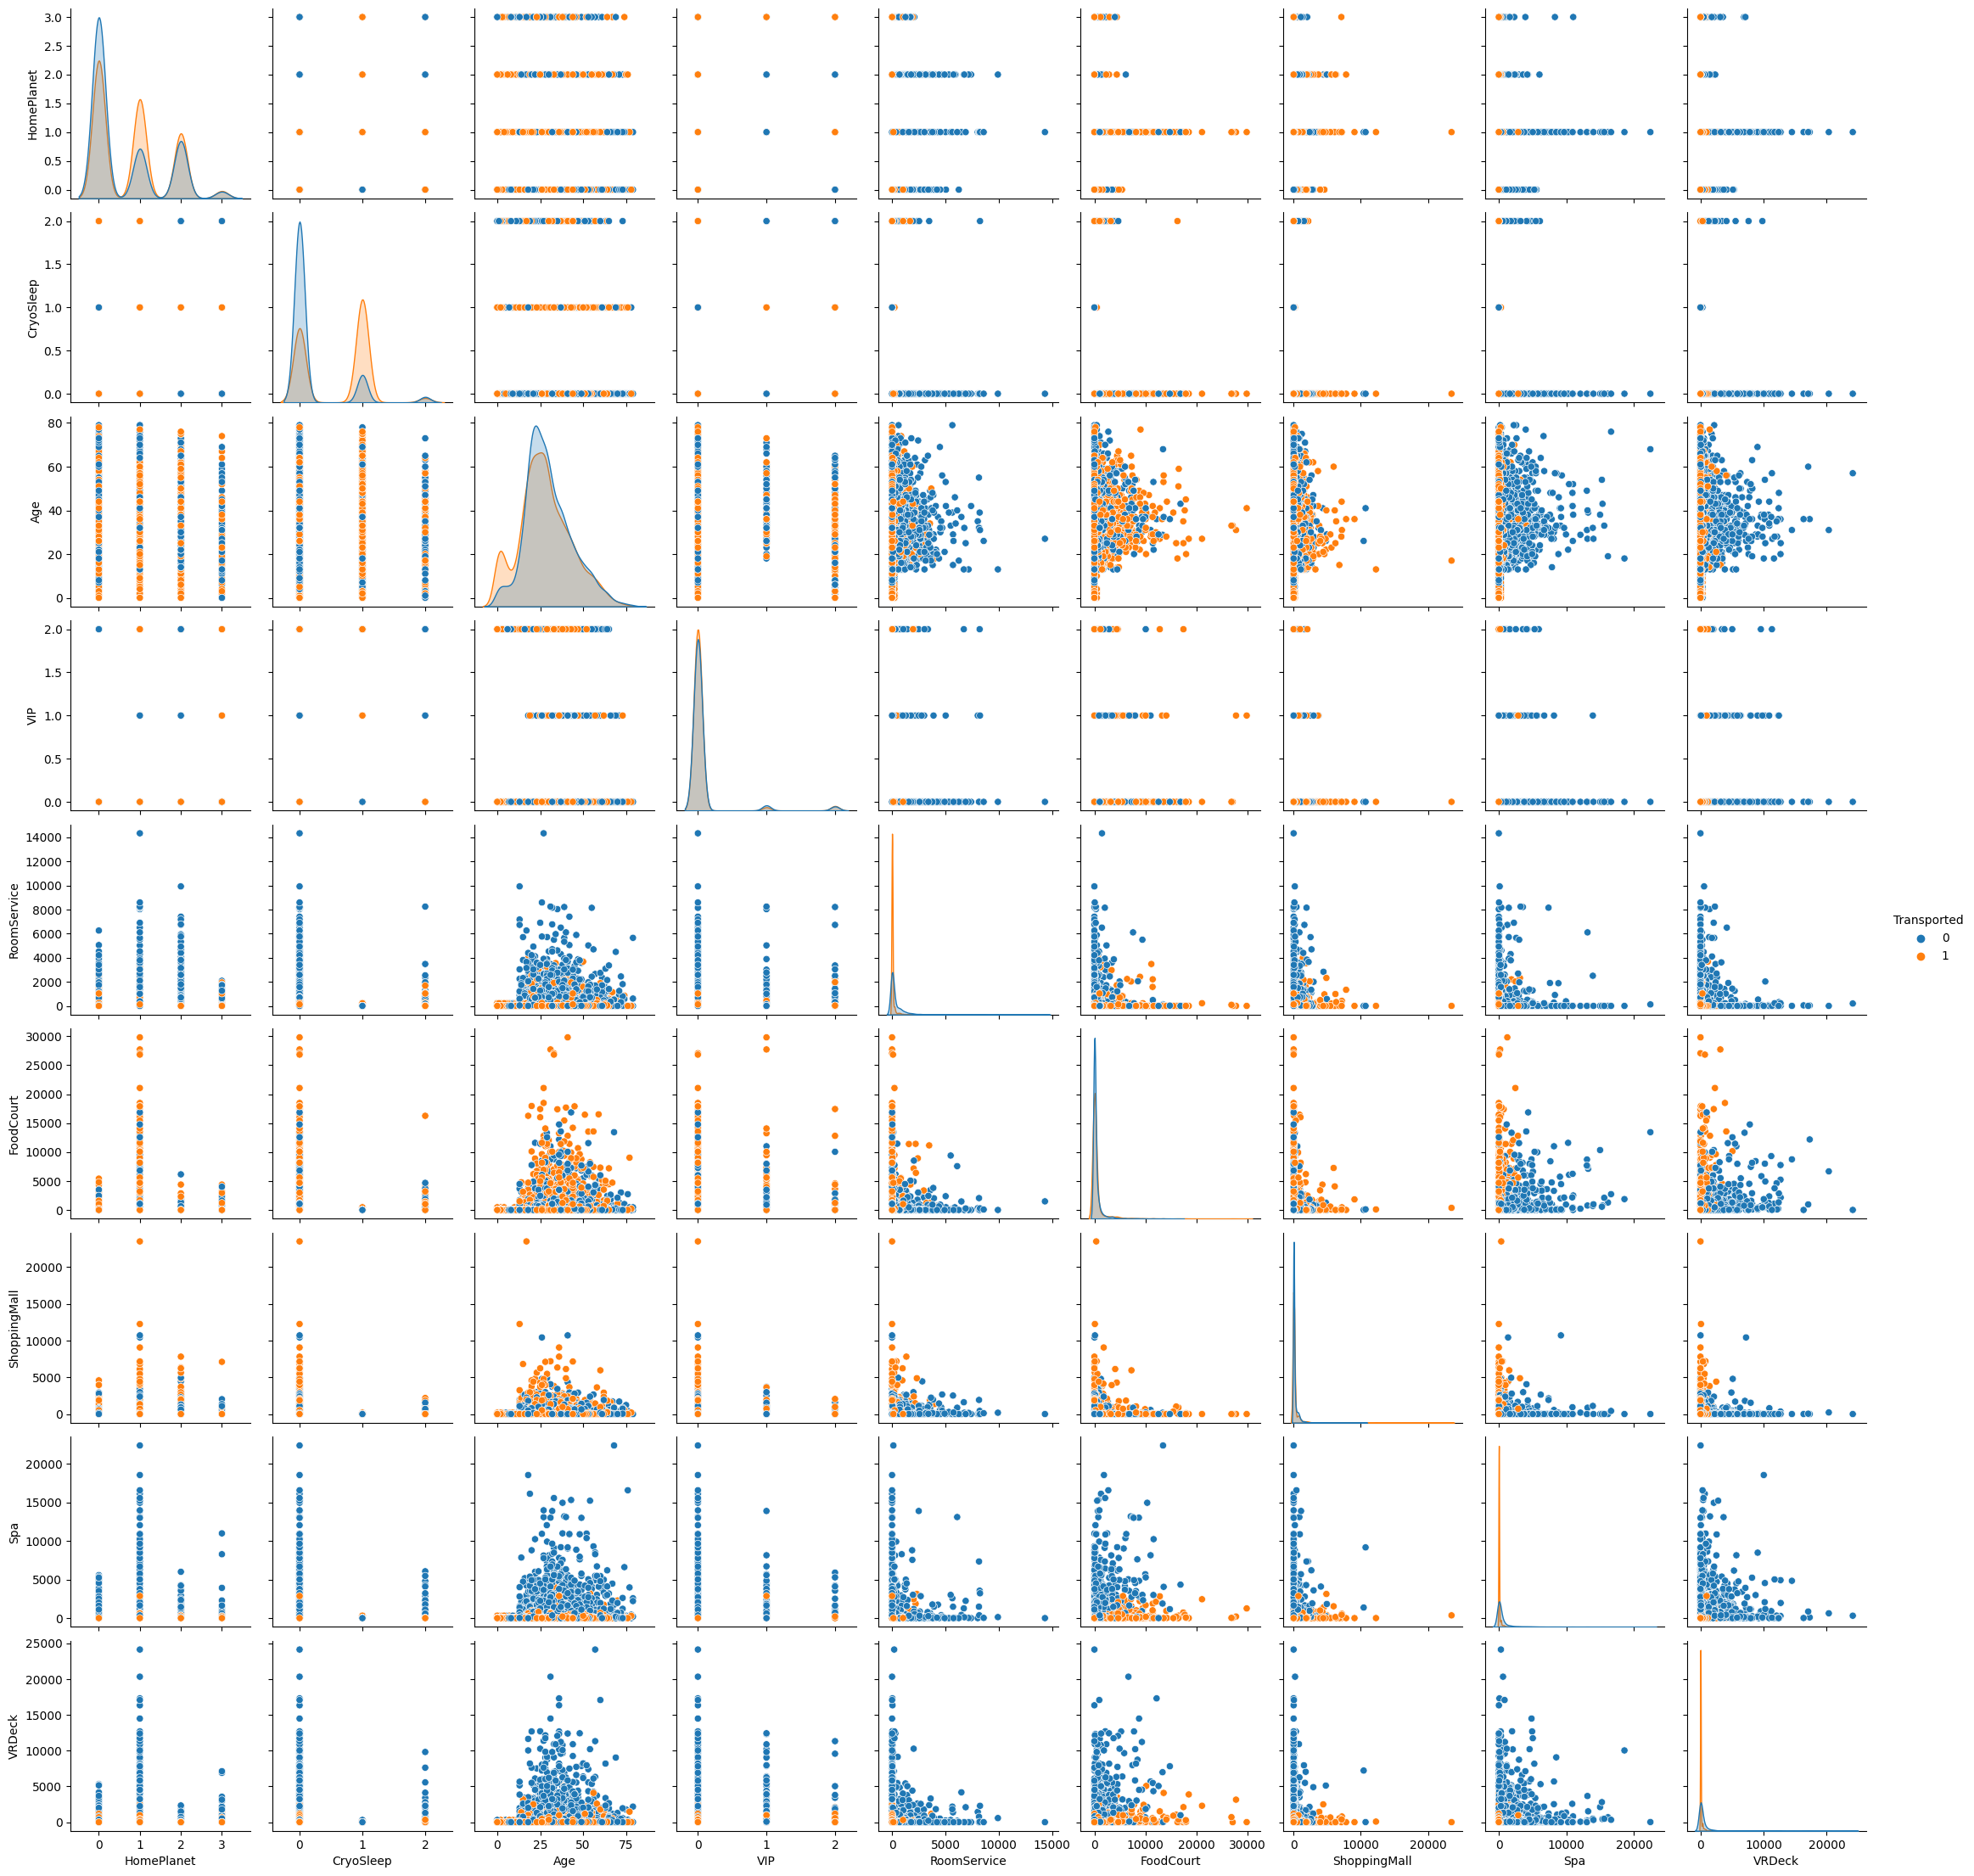

In [29]:
sns.pairplot(df,hue='Transported')
plt.show()

**Train & Test Split**

In [30]:
X = df.iloc[:,:-1]
X

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...
8688,1,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,0,1,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [31]:
y = df.iloc[:,-1:]
y

,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Convert y_train into 1D**

In [34]:
y_train_1d = np.ravel(y_train)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
from sklearn.model_selection import cross_val_score
from hyperopt import hp,tpe,fmin,Trials,STATUS_OK

In [37]:
GB = GradientBoostingClassifier()

In [38]:
Space = {
    'loss' : hp.choice('loss',['log_loss', 'exponential']),
    'learning_rate' : hp.uniform('learning_rate',1,5),
    'n_estimators' : hp.quniform('n_estimators',50,100,50),
    'criterion' : hp.choice('criterion',['friedman_mse', 'squared_error'])
}

In [39]:
def Bayesian(Space):
  GB = GradientBoostingClassifier(
      loss = Space['loss'],
      learning_rate = float(Space['learning_rate']),
      n_estimators  = int(Space['n_estimators']),
      criterion = Space['criterion']
  )
  accuracy = cross_val_score(GB,X_train,y_train_1d,cv=10).mean()
  return{'loss' : -accuracy , 'status' : STATUS_OK}

In [40]:
trials = Trials()

In [41]:
Best = fmin(fn=Bayesian,space=Space,algo=tpe.suggest,trials=trials,max_evals=200)

100%|██████████| 200/200 [16:02<00:00,  4.81s/trial, best loss: -0.785734929297941]


In [42]:
Best

{'criterion': 1,
 'learning_rate': 1.03031609574881,
 'loss': 1,
 'n_estimators': 50.0}

In [43]:
GB = GradientBoostingClassifier(criterion = 'friedman_mse',
                                learning_rate = 1.0722435496083451,
                                loss = 'exponential',
                                n_estimators = 50)

In [44]:
GB.fit(X_train,y_train_1d)

GradientBoostingClassifier(learning_rate=1.0722435496083451, loss='exponential',
                           n_estimators=50)

In [45]:
y_hat = GB.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [47]:
print(accuracy_score(y_test,y_hat))

0.7797584818861415


In [48]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       861
           1       0.76      0.83      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [49]:
print(confusion_matrix(y_test,y_hat))

[[631 230]
 [153 725]]
